In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
amazon = pd.read_csv('datasets/amazon_close.csv', parse_dates=True, index_col='date')

In [5]:
amazon.head()

,close
date,
2019-02-08,1588.22
2019-02-07,1614.37
2019-02-06,1640.26
2019-02-05,1658.81
2019-02-04,1633.31


In [4]:
from statsmodels.tsa.stattools import adfuller

In [6]:
# Run test
result = adfuller(amazon)

# Print test statistic
print(result)

(-1.344669096532608, 0.6084966311408366, 23, 1235, {'1%': -3.4356560275160835, '5%': -2.8638831211270817, '10%': -2.568017509711682}, 10782.877783880944)


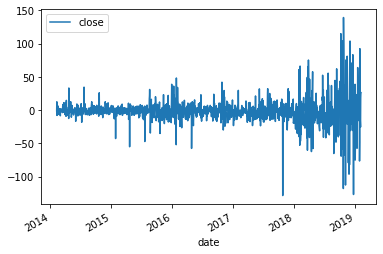

In [16]:
amazon_diff = amazon.diff().dropna()
amazon_diff.head()
amazon_diff.plot()

In [12]:
# Run test
result = adfuller(amazon_diff)

# Print test statistic
print(result)

(-14.046333541755535, 3.235815044107861e-26, 21, 1235, {'1%': -3.4356560275160835, '5%': -2.8638831211270817, '10%': -2.568017509711682}, 10788.806246122149)


In [19]:
model = SARIMAX(amazon_diff['close'], order=(3,0,3), trend='c')
result = model.fit()

C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. fore

In [20]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 1258
Model:               SARIMAX(3, 0, 3)   Log Likelihood               -5527.094
Date:                Sun, 12 Apr 2020   AIC                          11070.187
Time:                        15:47:06   BIC                          11111.286
Sample:                             0   HQIC                         11085.633
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.7455      0.995     -1.755      0.079      -3.695       0.204
ar.L1          0.1254      0.030      4.183      0.000       0.067       0.184
ar.L2          0.0234      0.032      0.742      0.458      -0.038       0.085
ar.L3         -0.9349      0.029    -31.918      0.000      -0.992      -0.877
ma.L1         -0.1205      0.029     -4.173      0.000      -0.177      -0.064
ma.L2         -0.0660      0.031     -2.113      0.035      -0.127      -0.005
ma.L3          0.9526      0.027     34.907      0.000       0.899       1.006
sigma2       380.5098      6.076     62.629      0.000     368.602     392.418
===================================================================================
Ljung-Box (Q):                       98.63   Jarque-Bera (JB):              6985.30
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.07   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
# Take the first difference of the data
amazon_diff = amazon.diff().dropna()

# Create ARMA(2,2) model
arma = SARIMAX(amazon_diff, order=(2,0,2))

# Fit model
arma_results = arma.fit()

# Print fit summary
print(arma_results.summary())

C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. fore

                               SARIMAX Results                                
Dep. Variable:                  close   No. Observations:                 1258
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -5534.654
Date:                Sun, 12 Apr 2020   AIC                          11079.308
Time:                        16:30:30   BIC                          11104.995
Sample:                             0   HQIC                         11088.962
                               - 1258                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1773      0.103     -1.723      0.085      -0.379       0.024
ar.L2          0.7722      0.105      7.352      0.000       0.566       0.978
ma.L1          0.1639      0.098      1.669      0.0

In [22]:
# Make arma forecast of next 10 differences
arma_diff_forecast = arma_results.get_forecast(steps=10).predicted_mean

# Integrate the difference forecast
arma_int_forecast = np.cumsum(arma_diff_forecast)

# Make absolute value forecast
arma_value_forecast = arma_int_forecast + amazon.iloc[-1,0]

# Print forecast
print(arma_value_forecast)

1258    359.999388
1259    360.587838
1260    359.811247
1261    360.403300
1262    359.698675
1263    360.280753
1264    359.633468
1265    360.197680
1266    359.597839
1267    360.139846
dtype: float64


C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [23]:
# Create ARIMA(2,1,2) model
arima = SARIMAX(amazon, order=(2,1,2))

# Fit ARIMA model
arima_results = arima.fit()

# Make ARIMA forecast of next 10 values
arima_value_forecast = arima_results.get_forecast(steps=10).predicted_mean

# Print forecast
print(arima_value_forecast)

C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. fore

1259    360.000845
1260    360.587969
1261    359.812615
1262    360.403541
1263    359.699954
1264    360.281089
1265    359.634662
1266    360.198099
1267    359.598955
1268    360.140339
dtype: float64


C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
